Use the D.C. Residential Properties dataset (https://www.kaggle.com/christophercorrea/dc-residential-properties) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [45]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [46]:
filepath = "datasets/DC_Properties.csv"

df = pd.read_csv(filepath)
df.head()

/home/avi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [47]:
#check if any missing values in the data
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [48]:
df1 = df.copy()
df1 = df1.dropna(subset=['PRICE'])

In [49]:
df1.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [50]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [51]:
df1.count()

BATHRM                98216
HF_BATHRM             98216
HEAT                  98216
AC                    98216
NUM_UNITS             57900
ROOMS                 98216
BEDRM                 98216
AYB                   98104
YR_RMDL               57674
EYB                   98216
STORIES               57867
SALEDATE              98215
PRICE                 98216
QUALIFIED             98216
SALE_NUM              98216
GBA                   57900
BLDG_NUM              98216
STYLE                 57900
STRUCT                57900
GRADE                 57900
CNDTN                 57900
EXTWALL               57900
ROOF                  57900
INTWALL               57900
KITCHENS              57899
FIREPLACES            98216
USECODE               98216
LANDAREA              98216
GIS_LAST_MOD_DTTM     98216
SOURCE                98216
CMPLX_NUM             40316
LIVING_GBA            40316
FULLADDRESS           57565
CITY                  57569
STATE                 57569
ZIPCODE             

In [52]:
df1.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,98216.000000,98216.000000,57900.000000,98216.000000,98216.000000,98104.000000,57674.000000,98216.000000,57867.000000,9.821600e+04,...,98216.000000,98216.000000,40316.000000,40316.000000,98216.000000,98216.000000,98216.000000,98216.000000,98115.000000,98115.000000
mean,1.859157,0.444541,1.221071,5.921836,2.606480,1944.903888,2000.666748,1965.759876,2.124667,9.313516e+05,...,14.613393,2084.296123,2442.438337,882.090907,20012.303525,38.913911,-77.018076,5289.710220,-77.018101,38.913903
std,0.978321,0.576217,0.623997,2.637816,1.393801,36.254098,16.136807,27.500116,3.948764,7.061325e+06,...,3.683449,2765.429658,1136.998556,406.013673,16.326982,0.030185,0.039794,3288.288804,0.039786,0.030161
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,11.000000,0.000000,1001.000000,199.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,2.400000e+05,...,11.000000,482.000000,1586.750000,619.000000,20005.000000,38.895973,-77.042758,2201.000000,-77.042768,38.895753
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1939.000000,2005.000000,1965.000000,2.000000,3.999990e+05,...,13.000000,1380.000000,2282.000000,781.000000,20010.000000,38.914207,-77.021489,5002.000000,-77.021262,38.914181
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,6.520000e+05,...,17.000000,2556.000000,2972.000000,1049.000000,20017.000000,38.933797,-76.990601,8100.000000,-76.990849,38.933756
max,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,117.000000,187301.000000,5621.000000,8553.000000,20392.000000,38.995435,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6372189b38>,
      dtype=object)

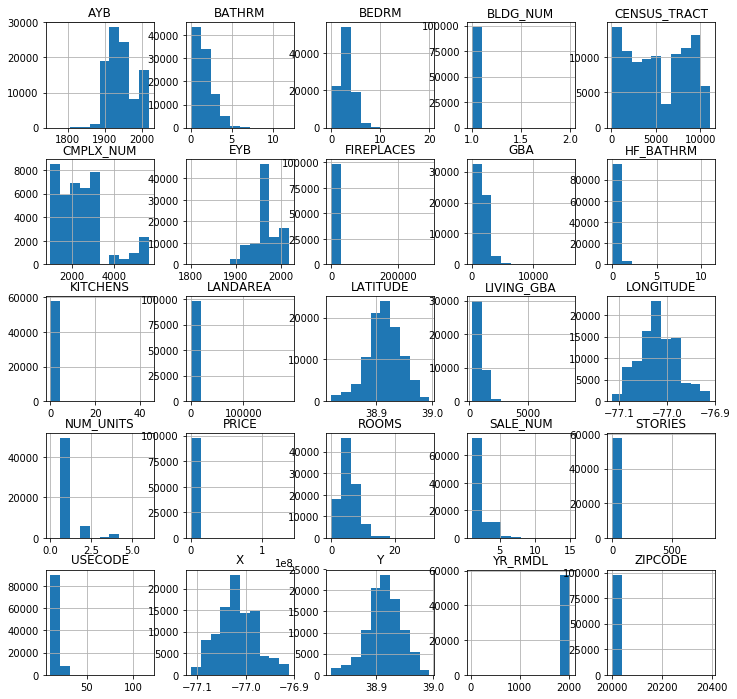

In [53]:
df1.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f636ea7e8d0>,
      dtype=object)

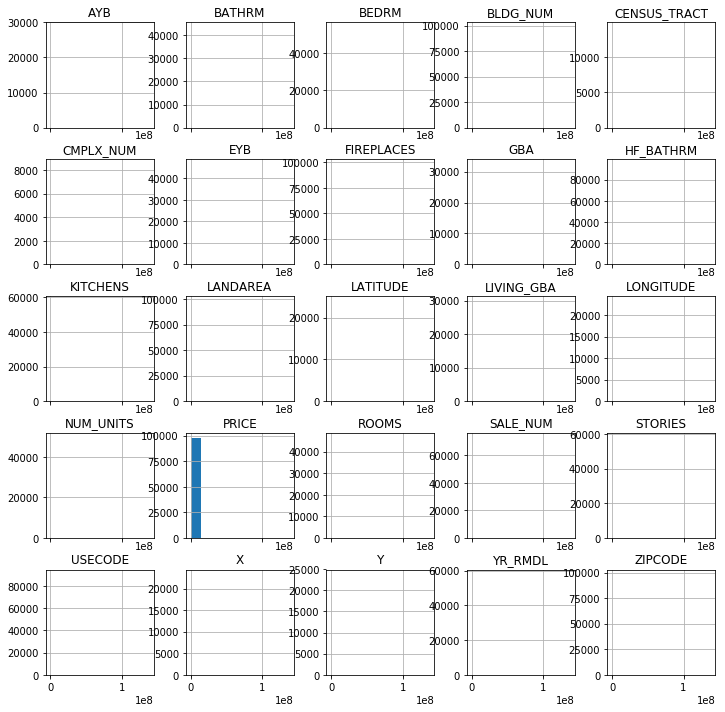

In [54]:
df1.hist(figsize=(12,12), sharex=True)

# z-score standardization

In [55]:
scaler = StandardScaler()
price_zscore = scaler.fit_transform(df1[['PRICE']])
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [56]:
price_z_col = pd.Series(price_zscore.reshape(-1))

In [57]:
price_z_col.head()

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64

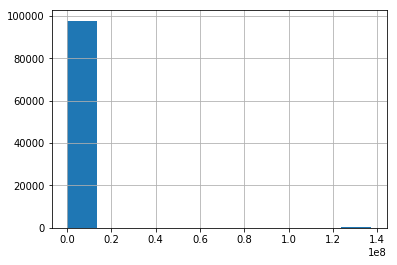

In [58]:
#BEFORE: frequency count plot of 'PRICE' column
df1['PRICE'].hist()

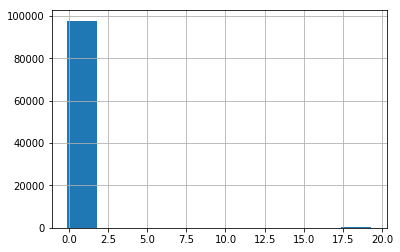

In [59]:
# AFTER
price_z_col.hist()

# min-max scaling

In [60]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [61]:
#use MinMaxScaler function and fit_transform function on the 'PRICE' column
price_minmax = minmax_sc.fit_transform(df1[['PRICE']])

In [62]:
price_minmax.mean(), price_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [63]:
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [64]:
#verify the range is between 0 and 1
price_mm_col.min(), price_mm_col.max()

(0.0, 0.9999999999999999)

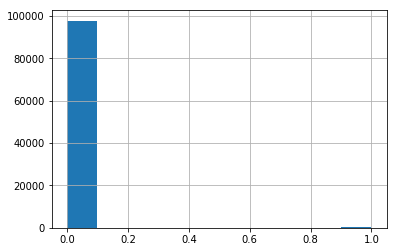

In [65]:
price_mm_col.hist()